**Analysing ITER parameters**

ITER is an international engineering and research project oriented towards demonstrating the technical and scientific viability of fusion as an energy source.
In this notebook We will compare our data to real-world plasma situations by using plasmapy.formulary
1. IRT1 Tokamak Data
2. Wendelstein 7-X Stellarator Data
3. Solar Corona
4. Interstellar (warm neutral) Medium
5. Solar Wind at 1 AU


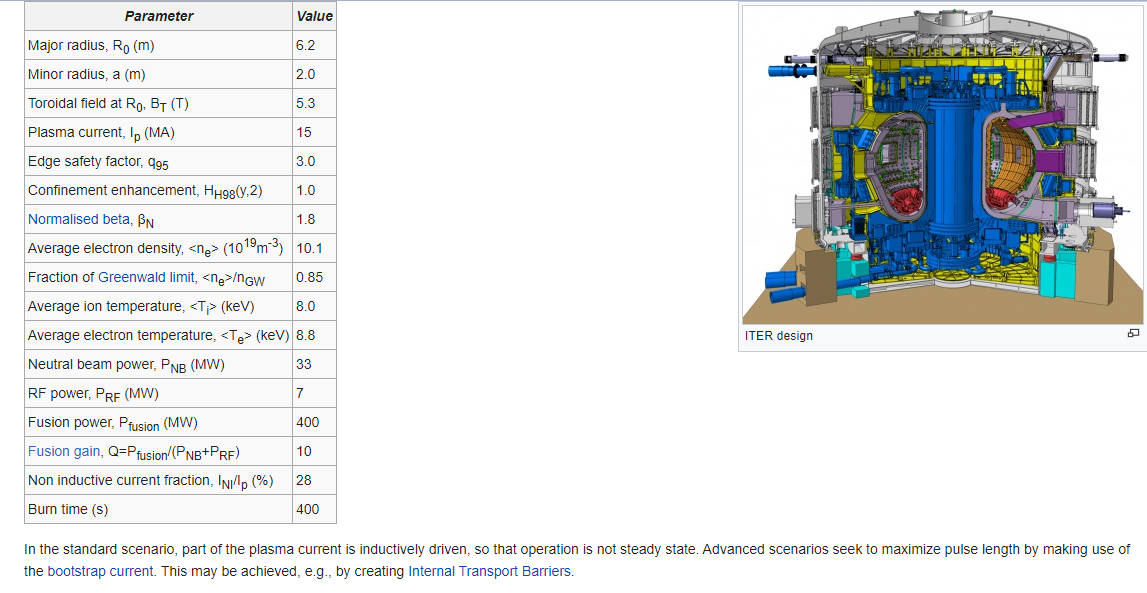

Let’s try to look at ITER plasma conditions using plasmapy.formulary.

In [ ]:
pip install plasmapy

In [ ]:
import plasmapy.dispersion.dispersionfunction
help(plasmapy.dispersion.dispersionfunction.plasma_dispersion_func)

In [2]:
import plasmapy

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u
from mpl_toolkits.mplot3d import Axes3D

from plasmapy import formulary

The radius of electric field shielding clouds, also known as the Debye_length(), would be

In [6]:
electron_temperature = 8.8 * u.keV
electron_concentration = 10.1e19 / u.m**3
print(formulary.Debye_length(electron_temperature, electron_concentration))

6.939046810942984e-05 m


Note that we can also neglect the unit for the concentration, as M(-3)
 is the a standard unit for this kind of Quantity

In [7]:
print(formulary.Debye_length(electron_temperature, 10.1e19))

6.939046810942984e-05 m


Assuming the magnetic field as 5.3 T (which is the value at the major radius)

In [8]:
B = 5.3 * u.T

print(formulary.gyrofrequency(B, particle="e"))

print(formulary.gyroradius(B, T=electron_temperature, particle="e"))

932174605709.2465 rad / s
6.0740821128350554e-05 m


/usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/checks.py:1390: RelativityWarning: thermal_speed is yielding a velocity that is 18.559% of the speed of light. Relativistic effects may be important.
  warnings.warn(


The electron inertial_length() would be

In [9]:
print(formulary.inertial_length(electron_concentration, particle="e"))

0.0005287720427518426 m


In these conditions, they should reach thermal velocities of about

In [10]:
print(formulary.thermal_speed(T=electron_temperature, particle="e"))

55637426.422858626 m / s


/usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/checks.py:1390: RelativityWarning: thermal_speed is yielding a velocity that is 18.559% of the speed of light. Relativistic effects may be important.
  warnings.warn(


The Langmuir wave plasma_frequency() should be on the order of

In [12]:
print(formulary.plasma_frequency(electron_concentration, particle="e-"))

566959736448.652 rad / s


Let’s try to recreate some plots and get a feel for some of these quantities. We will also compare our data to real-world plasma situations.

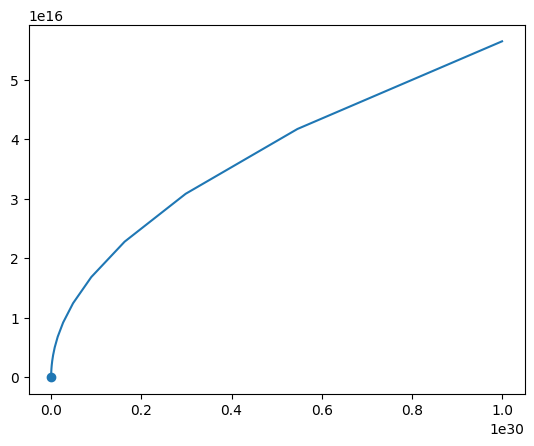

In [17]:
n_e = np.logspace(4, 30, 100) / u.m**3
plt.plot(n_e, formulary.plasma_frequency(n_e, particle="e-"))
plt.scatter(
    electron_concentration,
    formulary.plasma_frequency(electron_concentration, particle="e-"),
    label="Our Data",
)

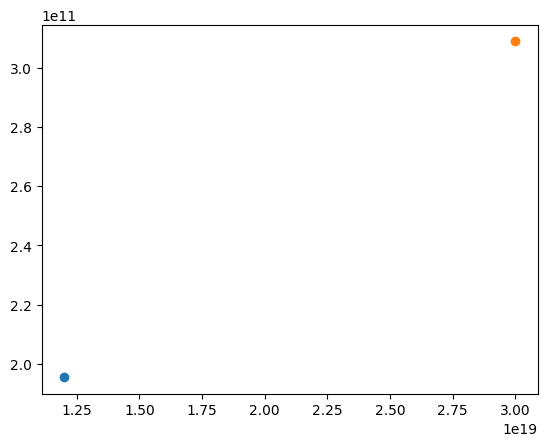

In [14]:
# IRT1 Tokamak Data
# http://article.sapub.org/pdf/10.5923.j.jnpp.20110101.03.pdf
n_e = 1.2e19 / u.m**3
T_e = 136.8323 * u.eV
B = 0.82 * u.T
plt.scatter(n_e, formulary.plasma_frequency(n_e, particle="e-"), label="IRT1 Tokamak")

# Wendelstein 7-X Stellarator Data
# https://nucleus.iaea.org/sites/fusionportal/Shared%20Documents/FEC%202016/fec2016-preprints/preprint0541.pdf
n_e = 3e19 / u.m**3
T_e = 6 * u.keV
B = 3 * u.T
plt.scatter(
    n_e, formulary.plasma_frequency(n_e, particle="e-"), label="W7-X Stellerator"
)

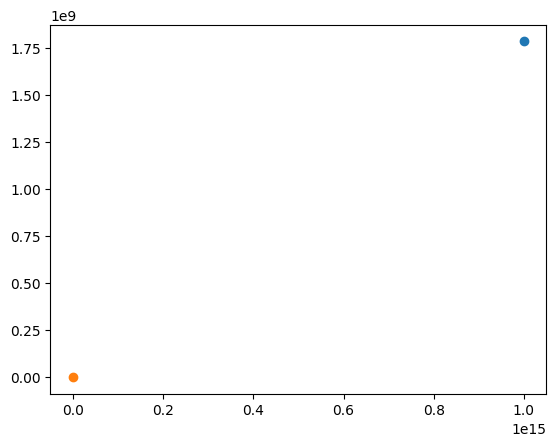

In [15]:
# Solar Corona
n_e = 1e15 / u.m**3
T_e = 1 * u.MK
B = 0.005 * u.T
T_e.to(u.eV, equivalencies=u.temperature_energy())
plt.scatter(n_e, formulary.plasma_frequency(n_e, particle="e-"), label="Solar Corona")

# Interstellar (warm neutral) Medium
n_e = 1e6 / u.m**3
T_e = 5e3 * u.K
B = 0.005 * u.T
T_e.to(u.eV, equivalencies=u.temperature_energy())
plt.scatter(
    n_e, formulary.plasma_frequency(n_e, particle="e-"), label="Interstellar Medium"
)

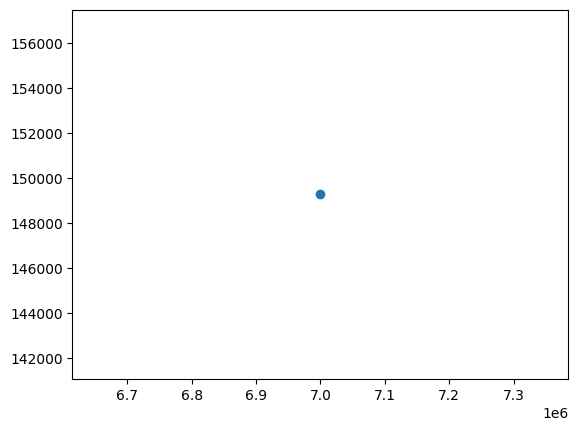

In [16]:
# Solar Wind at 1 AU
n_e = 7e6 / u.m**3
T_e = 1e5 * u.K
B = 5e-9 * u.T
T_e.to(u.eV, equivalencies=u.temperature_energy())
plt.scatter(
    n_e, formulary.plasma_frequency(n_e, particle="e-"), label="Solar Wind (1AU)"
)

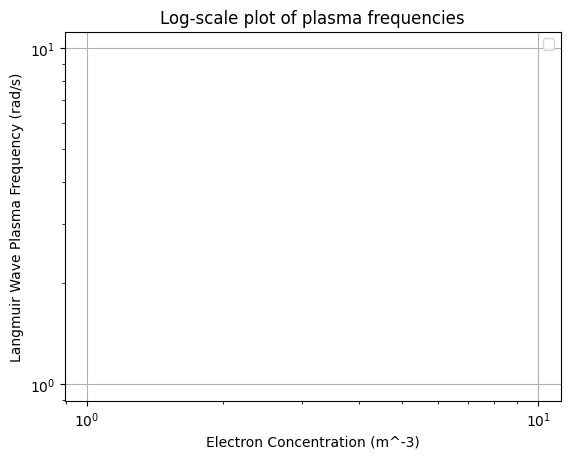

In [18]:
plt.xlabel("Electron Concentration (m^-3)")
plt.ylabel("Langmuir Wave Plasma Frequency (rad/s)")
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Log-scale plot of plasma frequencies")
plt.show()

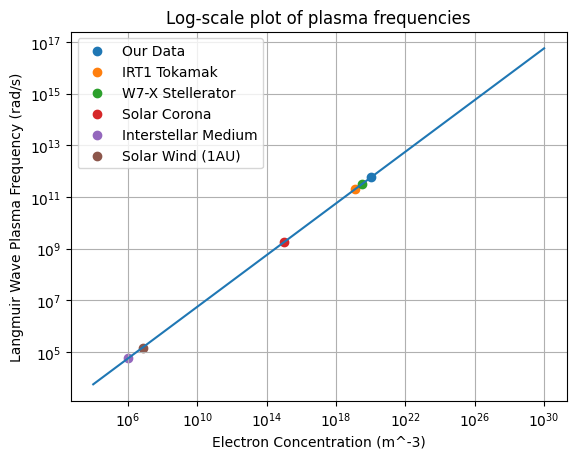

In [19]:
n_e = np.logspace(4, 30, 100) / u.m**3
plt.plot(n_e, formulary.plasma_frequency(n_e, particle="e-"))
plt.scatter(
    electron_concentration,
    formulary.plasma_frequency(electron_concentration, particle="e-"),
    label="Our Data",
)

# IRT1 Tokamak Data
# http://article.sapub.org/pdf/10.5923.j.jnpp.20110101.03.pdf
n_e = 1.2e19 / u.m**3
T_e = 136.8323 * u.eV
B = 0.82 * u.T
plt.scatter(n_e, formulary.plasma_frequency(n_e, particle="e-"), label="IRT1 Tokamak")

# Wendelstein 7-X Stellarator Data
# https://nucleus.iaea.org/sites/fusionportal/Shared%20Documents/FEC%202016/fec2016-preprints/preprint0541.pdf
n_e = 3e19 / u.m**3
T_e = 6 * u.keV
B = 3 * u.T
plt.scatter(
    n_e, formulary.plasma_frequency(n_e, particle="e-"), label="W7-X Stellerator"
)

# Solar Corona
n_e = 1e15 / u.m**3
T_e = 1 * u.MK
B = 0.005 * u.T
T_e.to(u.eV, equivalencies=u.temperature_energy())
plt.scatter(n_e, formulary.plasma_frequency(n_e, particle="e-"), label="Solar Corona")

# Interstellar (warm neutral) Medium
n_e = 1e6 / u.m**3
T_e = 5e3 * u.K
B = 0.005 * u.T
T_e.to(u.eV, equivalencies=u.temperature_energy())
plt.scatter(
    n_e, formulary.plasma_frequency(n_e, particle="e-"), label="Interstellar Medium"
)

# Solar Wind at 1 AU
n_e = 7e6 / u.m**3
T_e = 1e5 * u.K
B = 5e-9 * u.T
T_e.to(u.eV, equivalencies=u.temperature_energy())
plt.scatter(
    n_e, formulary.plasma_frequency(n_e, particle="e-"), label="Solar Wind (1AU)"
)

plt.xlabel("Electron Concentration (m^-3)")
plt.ylabel("Langmuir Wave Plasma Frequency (rad/s)")
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Log-scale plot of plasma frequencies")
plt.show()